### 텍스트 분석 수행 프로세스
#### 20 뉴스그룹 데이터 세트를 이용, 텍스트 분류
- 특정 문서의 분류를 학습 데이터를 통해 학습해 모델을 생성한 뒤 이 학습 모델을 이용해 다른 문서의 분류를 예측
- 텍스트를 피처 벡터화로 변환, 희소 행렬로 만들고 로지스틱 회귀를 이용해 분류 수행
- Count 기반 과 TF-IDF 기반의 벡터화를 각각 적용, 성능 비교
- 피처 벡터화를 위한 파라미터와 GridSearchCV 기반의 하이퍼파라미터 튜닝을 일괄적으로 수행

In [1]:
# 텍스트 정규화
# scikit-learn이 제공하는 데이터셋 다운로드 받기
from sklearn.datasets import fetch_20newsgroups
news_data = fetch_20newsgroups(subset='all', random_state=156)
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [9]:
#news_data.data

In [2]:
import pandas as pd
len(news_data.data)
pd.Series(news_data.target).value_counts()
# 20개 개수대로 sort돼서 나옴

10    999
15    997
8     996
9     994
11    991
13    990
7     990
5     988
14    987
2     985
12    984
3     982
6     975
1     973
4     963
17    940
16    910
0     799
18    775
19    628
dtype: int64

In [3]:
 news_data.DESCR

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total            

In [4]:
# 순수한 텍스트만으로 구성된 기사 내용으로 어떤 뉴스그룹에 속하는지 분류
#from sklearn.datasets import fetch_20newsgroups

# 텍스트 정규화
# 뉴스그룹 기사 내용을 제외하고 다른 정보 제거
# 제목, 소속, 이메일 등 헤더와 푸터 정보들은 분류의 타겟 클래스 값과 유사할 수 있음
train_news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
x_train = train_news.data
y_train = train_news.target

test_news = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), random_state=156)
x_test = test_news.data
y_test = test_news.target

print('학습데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data), len(test_news.data)))

학습데이터 크기 11314, 테스트 데이터 크기 7532


In [5]:
#import pandas as pd
import numpy as np
print(pd.Series(y_test).value_counts().sort_index())

0     319
1     389
2     394
3     392
4     385
5     395
6     390
7     396
8     398
9     397
10    399
11    396
12    393
13    396
14    394
15    398
16    364
17    376
18    310
19    251
dtype: int64


In [6]:
# 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가
# CountVectorizer으로 feature extraction 변환 수행
from sklearn.feature_extraction.text import CountVectorizer
cnt_vect = CountVectorizer()
cnt_vect.fit(x_train, y_train)
x_train_cnt_vect = cnt_vect.transform(x_train)

# 학습 데이터로 fit()된 CountVectorizer를 반드시 이용하여 테스트 데이터 feature extraction 변환 수행(피처 개수가 동일해야 함)
x_test_cnt_vect = cnt_vect.transform(x_test)

print(x_train_cnt_vect.shape)
print(x_test_cnt_vect.shape)

(11314, 101631)
(7532, 101631)


In [7]:
# CountVect-Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression()
lr.fit(x_train_cnt_vect, y_train)
lr_pred = lr.predict(x_test_cnt_vect)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(lr_accuracy)

"""
# 로지스틱 회귀를 적용, 뉴스그룹에 대한 분류 예측

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
lr_pred = lr_clf.predict(X_test_cnt_vect)
print(accuracy_score(y_test, lr_pred))
"""

0.6079394583112055


"\n# 로지스틱 회귀를 적용, 뉴스그룹에 대한 분류 예측\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score\nimport warnings\nwarnings.filterwarnings('ignore')\n\nlr_clf = LogisticRegression()\nlr_clf.fit(X_train_cnt_vect, y_train)\nlr_pred = lr_clf.predict(X_test_cnt_vect)\nprint(accuracy_score(y_test, lr_pred))\n"

In [8]:
# 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가
# Count Vectorization으로 feature extraction 변환 수행. 
from sklearn.feature_extraction.text import CountVectorizer
cnt_vect = CountVectorizer()
cnt_vect.fit(x_train,y_train)
X_train_cnt_vect = cnt_vect.transform(x_train)
# 학습 데이터로 fit( )된 CountVectorizer를 반드시 이용하여 테스트 데이터 
# feature extraction 변환 수행(피처 개수가 동일해야 함)
X_test_cnt_vect = cnt_vect.transform(x_test)
print(X_train_cnt_vect.shape)
print(X_test_cnt_vect.shape)

# 로지스틱 회귀를 적용, 뉴스그룹에 대한 분류 예측

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
lr_pred = lr_clf.predict(X_test_cnt_vect)
print(accuracy_score(y_test, lr_pred))

(11314, 101631)
(7532, 101631)
0.6079394583112055


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(x_train)
x_train_tfidf_vect = tfidf_vect.transform(x_train)

# 학습 데이터로 fit()된 CountVectorizer를 반드시 이용하여 테스트 데이터 feature extraction 변환 수행(피처 개수가 동일해야 함)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

print(x_train_tfidf_vect.shape)
print(x_test_tfidf_vect.shape)

(11314, 101631)
(7532, 101631)


In [10]:
# TF-IDF Vect - Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_tfidf_vect, y_train)
lr_pred = lr.predict(x_test_tfidf_vect)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(lr_accuracy)

0.6736590546999469


In [11]:
# 더 높은 정확도를 위해 불용어 제거

tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_vect.fit(x_train)
x_train_tfidf_vect = tfidf_vect.transform(x_train)

# 학습 데이터로 fit()된 CountVectorizer를 반드시 이용하여 테스트 데이터 feature extraction 변환 수행(피처 개수가 동일해야 함)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

print(x_train_tfidf_vect.shape)
print(x_test_tfidf_vect.shape)
print()

# TF-IDF Vect - Logistic Regression
lr = LogisticRegression(random_state=0)
lr.fit(x_train_tfidf_vect, y_train)
lr_pred = lr.predict(x_test_tfidf_vect)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(lr_accuracy)

(11314, 943737)
(7532, 943737)

0.6868029739776952


In [ ]:
# GridSearchCV

# 30분 이상 걸림
from sklearn.model_selection import GridSearchCV
# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정.
params = {'C':[5,10]}
gcv_lr = GridSearchCV(
    lr_clf
    , param_grid=params
    # 교차 검증 폴드 수
    , cv=3
    , scoring='accuracy'
    , verbose = 1)

gcv_lr.fit(x_train_tfidf_vect, y_train)
print(gcv_lr.best_params_)

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가.
lr_pred = gcv_lr.predict(X_test_tfidf_vect)
print(accuracy_score(y_test, lr_pred))

In [ ]:
# 30분 이상 소요
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])
# 하이퍼파라미터명이 개게 변수명과 결합 : 피처 벡터화 객체 파라미터와 Estimator 객체의 하이퍼파라미터 구별하기 위함
params = {'tfidf_vect__ngram_range':[(1,1),(1,2),(1,3)],
         'tfidf_vect__max_df':[100,300,700],
         'lr_clf__C':[1,5,10]}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3, \
                           scoring = 'accuracy', verbose = 1)
grid_cv_pipe.fit(x_train,y_train)
print(grid_cv_pipe.best_params_, grid_cv_pripe.best_score_)

pred = grid_cv_pipe.predict(x_test)
print(accuracy_score(y_test,pred))

### 뉴스기사의 카테고리 판정 - 네이버 뉴스 2400개 수집

아래 모듈은 참고

In [ ]:
# tfidf.py : TF-IDF로 텍스트를 벡터로 변환하는 모듈
from konlpy.tag import Okt
import pickle
import numpy as np

# KoNLPy의 Okt객체 초기화 
okt = Okt()
# 전역 변수 
word_dic = {'_id': 0} # 단어 사전
dt_dic = {} # 문장 전체에서의 단어 출현 횟수
files = [] # 문서들을 저장할 리스트

def tokenize(text):
    '''KoNLPy로 형태소 분석하기''' 
    result = []
    word_s = okt.pos(text, norm=True, stem=True)
    for n, h in word_s:
        if not (h in ['Noun', 'Verb ', 'Adjective']): continue
        if h == 'Punctuation' and h2 == 'Number': continue
        result.append(n)
    return result

def words_to_ids(words, auto_add = True):
    ''' 단어를 ID로 변환하기 ''' 
    result = []
    for w in words:
        if w in word_dic:
            result.append(word_dic[w])
            continue
        elif auto_add:
            id = word_dic[w] = word_dic['_id']
            word_dic['_id'] += 1
            result.append(id)
    return result

def add_text(text):
    '''텍스트를 ID 리스트로 변환해서 추가하기''' 
    ids = words_to_ids(tokenize(text))
    files.append(ids)

def add_file(path):
    '''텍스트 파일을 학습 전용으로 추가하기''' 
    with open(path, "r", encoding="utf-8") as f:
        s = f.read()
        add_text(s)

def calc_files():
    '''추가한 파일 계산하기''' 
    global dt_dic
    result = []
    doc_count = len(files)
    dt_dic = {}
    # 단어 출현 횟수 세기
    for words in files:
        used_word = {}
        data = np.zeros(word_dic['_id'])
        for id in words:
            data[id] += 1
            used_word[id] = 1
        # 단어 t가 사용되고 있을 경우 dt_dic의 수를 1 더하기 
        for id in used_word:
            if not(id in dt_dic): dt_dic[id] = 0
            dt_dic[id] += 1
        # 정규화하기 
        data = data / len(words) 
        result.append(data)
    # TF-IDF 계산하기 
    for i, doc in enumerate(result):
        for id, v in enumerate(doc):
            idf = np.log(doc_count / dt_dic[id]) + 1
            doc[id] = min([doc[id] * idf, 1.0])
        result[i] = doc
    return result

def save_dic(fname):
    '''사전을 파일로 저장하기''' 
    pickle.dump(
        [word_dic, dt_dic, files],
        open(fname, "wb"))

def load_dic(fname):
    '''사전 파일 읽어 들이기''' 
    global word_dic, dt_dic, files
    n = pickle.load(open(fname, 'rb'))
    word_dic, dt_dic, files = n

def calc_text(text):
    ''' 문장을 벡터로 변환하기 ''' 
    data = np.zeros(word_dic['_id'])
    words = words_to_ids(tokenize(text), False)
    for w in words:
        data[w] += 1
    data = data / len(words)
    for id, v in enumerate(data):
        idf = np.log(len(files) / dt_dic[id]) + 1
        data[id] = min([data[id] * idf, 1.0])
    return data
# 모듈 테스트하기 
if __name__ == '__main__':
    add_text('비')
    add_text('오늘은 비가 내렸어요.') 
    add_text('오늘은 더웠지만 오후부터 비가 내렸다.') 
    add_text('비가 내리는 일요일이다.') 
    print(calc_files())
    print(word_dic)

In [ ]:
# 네이버 뉴스 정치, 경제, 생활, IT/과학 기사 TF-IDF 벡터 변환 후 genre.pickle로 저장
# 텍스트 분류 과정
# 1. 텍스트에서 불필요한 품사를 제거
# 2. 사전을 기반으로 단어를 숫자로 변환
# 3. 파일 내부의 단어 출현 비율을 계산
# 4. 데이터를 학습

# makedb_tfidf.py : 문장의 형태소를 벡터로 변환
import os, glob, pickle
import tfidf

# 변수 초기화
y = []
x = []

# 디렉터리 내부의 파일 목록 전체에 대해 처리하기 
def read_files(path, label):
    print("read_files=", path)
    files = glob.glob(path + "/*.txt")
    for f in files:
        if os.path.basename(f) == 'LICENSE.txt': continue
        tfidf.add_file(f)
        y.append(label)

# 기사를 넣은 디렉터리 읽어 들이기 
read_files('dataset/100', 0)
read_files('dataset/101', 1)
read_files('dataset/103', 2)
read_files('dataset/105', 3)


# TF-IDF 벡터로 변환하기 
x = tfidf.calc_files()

# 저장하기 
pickle.dump([y, x], open('dataset/genre.pickle', 'wb'))
tfidf.save_dic('dataset/genre-tdidf.dic')
print('ok')

### 실습

In [2]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np

# TF-IDF 데이터베이스 읽어 들이기
data = pickle.load(open('./dataset/genre.pickle', 'rb'))

# 레이블
y = data[0]

# TF-IDF
x= data[1]

print(len(y))
print(len(x))

3197
3197


In [5]:
# 학습, 테스트 분할
x_train, x_test, y_train, y_test = train_test_split(
    x, y
    , test_size=0.2
)

# 모델 생성(나이브 베이지안, 가우시안)
model = GaussianNB()
model.fit(x_train, y_train)

# 모델 평가, 결과 출력
y_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
rep = metrics.classification_report(y_test, y_pred)

print('accuracy = ', acc)
print()
print(rep)

accuracy =  0.8

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       138
           1       0.80      0.70      0.75       169
           2       0.72      0.89      0.80       160
           3       0.82      0.74      0.78       173

    accuracy                           0.80       640
   macro avg       0.81      0.81      0.80       640
weighted avg       0.81      0.80      0.80       640



In [12]:
import pickle
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import h5py
import warnings
warnings.filterwarnings('ignore')

# 분류할 레이블 수
nb_classes = 4

# read database
data = pickle.load(open('./dataset/genre.pickle', 'rb'))

# label
y = data[0]
# TF-IDF
x = data[1]

#import pandas as pd
#print(pd.Series(y).value_counts())

In [2]:
print(len(np.array(y)))
x[0].shape

3197


(36120,)

Train on 2557 samples, validate on 640 samples
Epoch 1/10
2557/2557 [==============================] - 4s 1ms/step - loss: 0.8486 - accuracy: 0.7270 - val_loss: 0.4104 - val_accuracy: 0.8500
Epoch 2/10
2557/2557 [==============================] - 3s 1ms/step - loss: 0.2303 - accuracy: 0.9280 - val_loss: 0.3343 - val_accuracy: 0.8750
Epoch 3/10
2557/2557 [==============================] - 3s 1ms/step - loss: 0.0953 - accuracy: 0.9734 - val_loss: 0.3270 - val_accuracy: 0.8844
Epoch 4/10
2557/2557 [==============================] - 3s 1ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.3343 - val_accuracy: 0.8953
Epoch 5/10
2557/2557 [==============================] - 4s 1ms/step - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.3930 - val_accuracy: 0.8844
Epoch 6/10
2557/2557 [==============================] - 3s 1ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.4298 - val_accuracy: 0.8828
Epoch 7/10
2557/2557 [==============================] - 3s 1ms/step - loss: 0.0079 - accu

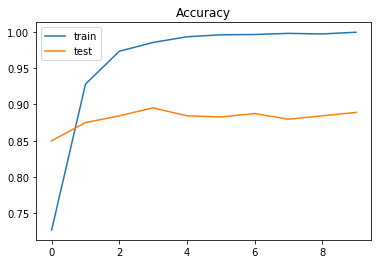

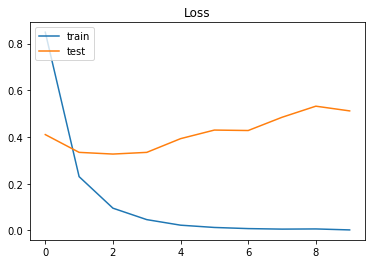

In [13]:
# 레이블 데이터를 One-hot 형식 변환
y = keras.utils.np_utils.to_categorical(y, nb_classes)
in_size = x[0].shape[0]

# 학습 전용과 테스트 전용으로 구분하기
x_train, x_test, y_train, y_test = train_test_split(
    np.array(x), np.array(y)
    , test_size=0.2
)

# MLP모델의 구조 정의하기
# 이진분류 : 시그모이드 활성화 함수와 하나의 유닛
# 다중 분류 : 소프트맥스 활성화 함수와 k개의 유닛
# 회귀 : 아무런 활성화 함수를 사용하지 않는 
# dropout: 훈련도중 층의 출력 특성을 랜덤하게 유도
# 0이 되는 특성의 비율 0.2~0.5
# relu f(z) = max(0.z) z값이 0보다 크면 z가 되고 0보다 작으면 0이 됨
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))

# 모델 컴파일하기
# 손실 함수를 정의: 이진 크로스 엔트로피(이진 분류), 범주형 크로스 엔트로피(다중 분류)
# 옵티마이저(가장 작은 손실 함수 오차를 만드는 모델 파라미터 값을 찾는 전략)
# 확률적 경사 하강법, 모멘텀을 사용한 확률적 경사 하강법, RMSProp, Adam(Adaptive momentum)
# compile 메소드와 metrics 매개변수를 지정하지 않으면 
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 학습 실행하기 
hist = model.fit(x_train, y_train,
          batch_size=128, 
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# 평가하기 
score = model.evaluate(x_test, y_test, verbose=1)
print("정답률=", score[1], 'loss=', score[0])

# 가중치데이터 저장하기 
model.save_weights('./dataset/genre-model.hdf5')

# 학습 상태를 그래프로 그리기
# 모델 학습을 위해 fit() 함수를 사용하며 리턴값으로 학습 이력(History) 정보를 리턴
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도
# plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
#plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist.history['val_accuracy'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

오버피팅(과적합)
모델이 훈련 데이터에 매우 잘 맞지만 일반성이 떨어짐(test loss 우상향)

In [22]:
# 기사 섹션 자동 판별

import pickle, tfidf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import model_from_json
import warnings
warnings.filterwarnings('ignore')

# 텍스트 준비하기 --- ( ※ 1)
text1 = """
대통령이 북한과 관련된 이야기로 한미 정상회담을 준비하고 있습니다.
"""
text2 = """
iPhone과 iPad를 모두 가지고 다니므로 USB를 2개 연결할 수 있는 휴대용 배터리를 선호합니다.
"""
text3 = """
이번 주에는 미세먼지가 많을 것으로 예상되므로 노약자는 외출을 자제하는 것이 좋습니다.
"""
text4 = """
국내 개인투자자들의 주식투자 열풍이 불면서 최근 '동학개미운동'이라는 신조어까지 등장한 가운데, 개인투자자들도 향후 시장 움직임에 따른 투자전략을 준비할 필요성이 높아졌다.
"""

# TF-IDF 사전 읽어 들이기 --- (*2)
tfidf.load_dic("./dataset/genre-tdidf.dic")

# Keras 모델 정의하고 가중치 데이터 읽어 들이기 --- (*3)
nb_classes = 4
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(36120,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])
model.load_weights('./dataset/genre-model.hdf5')

# 텍스트 지정해서 판별하기 --- (*4)
def check_genre(text):
    # 레이블 정의하기
    LABELS = ["정치", "경제", "생활 ", "IT/과학"]
    # TF-IDF 벡터로 변환하기 -- (*5)
    # 만들어놓은 모듈임
    data = tfidf.calc_text(text)
    # MLP로 예측하기 --- (*6)
    pre = model.predict(np.array([data]))[0]
    # argmax(): 최대치의 인덱스를 반환(정수)
    n = pre.argmax()
    print(LABELS[n], "(", pre[n], ")")
    # 인덱스에 해당하는 값, 가장 큰 값
    return LABELS[n], float(pre[n]), int(n) 

# 기사 섹션 자동 판별
if __name__ == '__main__':
    print('[text1]'); check_genre(text1); print()
    print('[text2]'); check_genre(text2); print()
    print('[text3]'); check_genre(text3); print()
    print('[text4]'); check_genre(text4); print()

[text1]
정치 ( 0.99999976 )

[text2]
IT/과학 ( 0.99498606 )

[text3]
생활  ( 0.9999747 )

[text4]
경제 ( 0.96317756 )

